In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [303]:
# Load the dataset
file_path = "Crop_recommendation.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Display dataset info
print(df.head())
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  Unnamed: 8  Unnamed: 9  
0  202.935536  rice         NaN         NaN  
1  226.655537  rice         NaN         NaN  
2  263.964248  rice         NaN         NaN  
3  242.864034  rice         NaN         NaN  
4  262.717340  rice         NaN         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium  

In [304]:
# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Ensure all numerical columns have consistent data types
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\Ganesh\AppData\Local\Temp\ipykernel_10780\3673028713.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


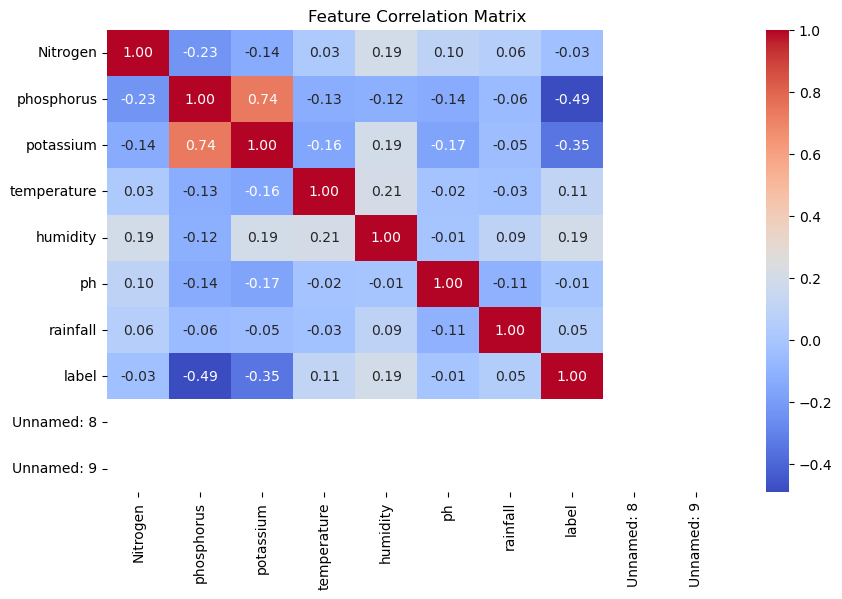

In [305]:
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [306]:
# Split dataset into features and labels
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [307]:
# Optimized model parameters
# Optimized model parameters
rf_model = RandomForestClassifier(
    n_estimators=200,  # Increase estimators for better generalization
    max_depth=15,      # Adjust tree depth to balance complexity
    min_samples_split=3,  # Fine-tune min samples for better splits
    min_samples_leaf=1,   # Allow single sample leaves for flexibility
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=skf)
print(f"Cross-validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")


Cross-validation Accuracy: 0.99 (+/- 0.00)


In [308]:
# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [309]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
      

C:\Users\Ganesh\AppData\Local\Temp\ipykernel_10780\3094205521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


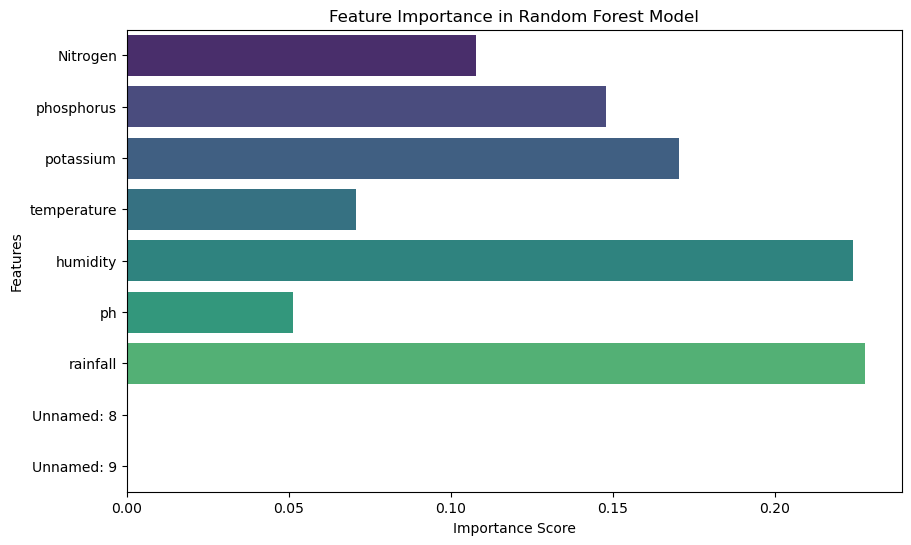

In [310]:
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [311]:

# Save the trained model
joblib.dump(rf_model, "crop_recommendation_model.pkl")
print("Model saved successfully!")

Model saved successfully!
